In [3]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
#%load_ext nb_black

import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_curve,
    roc_auc_score
)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [82]:
df = pd.read_csv("/content/drive/MyDrive/Python Course/Supervised Learning _ Classification/Hands-On Quiz/backpain.csv")

In [83]:
# copying data to another variable to avoid any changes to original data
data = df.copy()

In [8]:
data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.02782,22.55259,39.60912,40.47523,98.67292,-0.25440,0.74450,12.56610,14.53860,15.30468,-28.65850,43.51230,Abnormal
1,39.05695,10.06099,25.01538,28.99596,114.40543,4.56426,0.41519,12.88740,17.53230,16.78486,-25.53061,16.11020,Abnormal
2,68.83202,22.21848,50.09219,46.61354,105.98514,-3.53032,0.47489,26.83430,17.48610,16.65897,-29.03189,19.22210,Abnormal
3,69.29701,24.65288,44.31124,44.64413,101.86850,11.21152,0.36935,23.56030,12.70740,11.42447,-30.47025,18.83290,Abnormal
4,49.71286,9.65207,28.31741,40.06078,108.16872,7.91850,0.54336,35.49400,15.95460,8.87237,-16.37838,24.91710,Abnormal


In [9]:
data.tail()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
305,47.90357,13.61669,36.00000,34.28688,117.44906,-4.24540,0.12974,7.84330,14.74840,8.51707,-15.72893,11.54720,Normal
306,53.93675,20.72150,29.22053,33.21525,114.36584,-0.42101,0.04791,19.19860,18.19720,7.08745,6.01384,43.86930,Normal
307,61.44660,22.69497,46.17035,38.75163,125.67072,-2.70788,0.08107,16.20590,13.55650,8.89572,3.56446,18.41510,Normal
308,45.25279,8.69316,41.58313,36.55963,118.54584,0.21475,0.15925,14.73340,16.09280,9.75922,5.76731,33.71920,Normal
309,33.84164,5.07399,36.64123,28.76765,123.94524,-0.19925,0.67450,19.38250,17.69630,13.72929,1.78301,40.60490,Normal


In [10]:
data.shape

(310, 13)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [12]:
# checking for null values
data.isnull().sum()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Status                      0
dtype: int64

In [13]:
# checking for duplicate values
data.duplicated().sum()

0

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.00000,60.49665,17.23652,26.14792,46.43029,58.69104,72.87770,129.83404
pelvic tilt,310.00000,17.54282,10.00833,-6.55495,10.66707,16.35769,22.12039,49.43186
lumbar_lordosis_angle,310.00000,51.93093,18.55406,14.00000,37.00000,49.56240,63.00000,125.74239
sacral_slope,310.00000,42.95383,13.42310,13.36693,33.34712,42.40491,52.69589,121.42957
pelvic_radius,310.00000,117.92066,13.31738,70.08257,110.70920,118.26818,125.46767,163.07104
degree_spondylolisthesis,310.00000,26.29669,37.55903,-11.05818,1.60373,11.76793,41.28735,418.54308
pelvic_slope,310.00000,0.47298,0.28579,0.00322,0.22437,0.47599,0.70485,0.99883
Direct_tilt,310.00000,21.32153,8.63942,7.02700,13.05440,21.90715,28.95408,36.74390
thoracic_slope,310.00000,13.06451,3.39971,7.03780,10.41780,12.93845,15.88953,19.32400
cervical_tilt,310.00000,11.93332,2.89327,7.03060,9.54114,11.95383,14.37181,16.82108


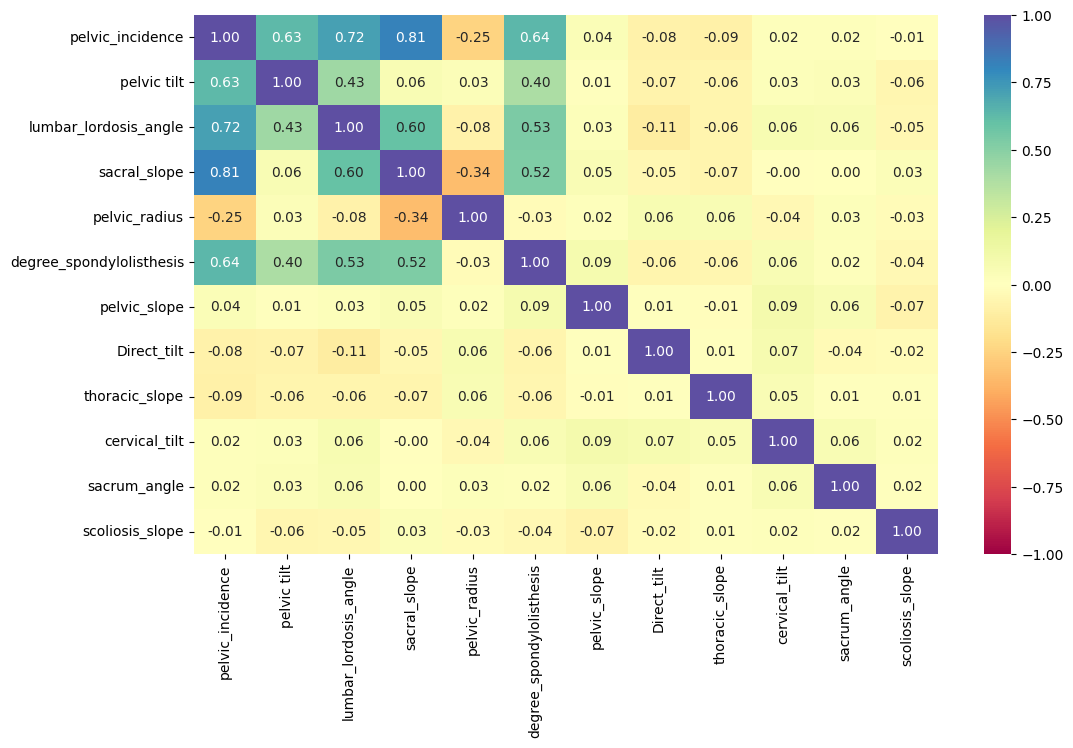

In [15]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [18]:
data.Status.value_counts()

Abnormal    210
Normal      100
Name: Status, dtype: int64

In [20]:
data=data.replace({"Status":{"Normal": 0, "Abnormal": 1 }})

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 31.6 KB


In [35]:
# specifying the independent  and dependent variables
X = data.drop(["Status"], axis=1)
Y = data["Status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [36]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (217, 13)
Shape of test set :  (93, 13)
Percentage of classes in training set:
1   0.66359
0   0.33641
Name: Status, dtype: float64
Percentage of classes in test set:
1   0.70968
0   0.29032
Name: Status, dtype: float64


In [37]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                      200.47098
pelvic_incidence                 inf
pelvic tilt                      inf
lumbar_lordosis_angle        2.27825
sacral_slope                     inf
pelvic_radius                1.22573
degree_spondylolisthesis     1.83566
pelvic_slope                 1.03063
Direct_tilt                  1.06079
thoracic_slope               1.01278
cervical_tilt                1.06144
sacrum_angle                 1.04031
scoliosis_slope              1.03586
dtype: float64



In [39]:
X_train1 = X_train.drop("sacral_slope", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                      200.19239
pelvic_incidence             3.77858
pelvic tilt                  1.71311
lumbar_lordosis_angle        2.22815
pelvic_radius                1.22209
degree_spondylolisthesis     1.83022
pelvic_slope                 1.03031
Direct_tilt                  1.06027
thoracic_slope               1.00570
cervical_tilt                1.06059
sacrum_angle                 1.04031
scoliosis_slope              1.02059
dtype: float64



In [41]:
X_test1 = X_test.drop("sacral_slope", axis=1)

In [40]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train1.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      205
Method:                           MLE   Df Model:                           11
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.5421
Time:                        22:20:20   Log-Likelihood:                -63.451
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 1.318e-26
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       21.8597      4.879      4.480      0.000      12.297      31.422
pelvic_incidence            -0.1000      0.037     -2.684      0.007      -0.173      -0.

In [43]:
X_train2 = X_train1.drop(["lumbar_lordosis_angle","pelvic_slope","Direct_tilt","thoracic_slope","cervical_tilt","sacrum_angle","scoliosis_slope"], axis=1)
X_train2.columns

Index(['const', 'pelvic_incidence', 'pelvic tilt', 'pelvic_radius',
       'degree_spondylolisthesis'],
      dtype='object')

In [44]:
X_test2 = X_test1.drop(["lumbar_lordosis_angle","pelvic_slope","Direct_tilt","thoracic_slope","cervical_tilt","sacrum_angle","scoliosis_slope"], axis=1)
X_test2.columns

Index(['const', 'pelvic_incidence', 'pelvic tilt', 'pelvic_radius',
       'degree_spondylolisthesis'],
      dtype='object')

In [46]:
# fitting logistic regression model
logit1 = sm.Logit(y_train, X_train2.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      212
Method:                           MLE   Df Model:                            4
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.5327
Time:                        22:31:04   Log-Likelihood:                -64.760
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 6.512e-31
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       19.8000      4.286      4.619      0.000      11.399      28.201
pelvic_incidence            -0.1099      0.026     -4.284      0.000      -0.160      -0.

In [47]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [48]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [49]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [50]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(1, 9, 1), None]
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)
grid_obj

# Set the clf to the best combination of parameters
#estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
#estimator.fit(X_train, y_train)
for i
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [array([1, 2, 3, 4, 5, 6, 7, 8]), None]},
             scoring=make_scorer(recall_score))

In [52]:
# Define a grid of depth parameters to check
depths = [1, 2, 3, 4, 5, 6, 7, 8]

# Check the recall for each depth parameter
for depth in depths:
    # Create a decision tree classifier with the current depth
    clf = DecisionTreeClassifier(max_depth=depth)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)

    # Print the depth and recall score
    print(f"Depth {depth}: Recall = {recall}")

Depth 1: Recall = 0.7121212121212122
Depth 2: Recall = 0.8636363636363636
Depth 3: Recall = 0.7575757575757576
Depth 4: Recall = 0.8181818181818182
Depth 5: Recall = 0.7575757575757576
Depth 6: Recall = 0.8181818181818182
Depth 7: Recall = 0.7727272727272727
Depth 8: Recall = 0.7727272727272727


In [71]:
score_DT = []
for i in range(1,9):
 dTree = DecisionTreeClassifier(max_depth=i,criterion = 'gini', random_state=1)
 dTree.fit(X_train, y_train)
 pred = dTree.predict(X_train)
 case = {'Depth':i,'Recall':recall_score(y_train,pred)}
 score_DT.append(case)
print(score_DT)

[{'Depth': 1, 'Recall': 0.6875}, {'Depth': 2, 'Recall': 0.8888888888888888}, {'Depth': 3, 'Recall': 0.8888888888888888}, {'Depth': 4, 'Recall': 0.9583333333333334}, {'Depth': 5, 'Recall': 0.9652777777777778}, {'Depth': 6, 'Recall': 0.9930555555555556}, {'Depth': 7, 'Recall': 0.9861111111111112}, {'Depth': 8, 'Recall': 1.0}]


In [54]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [55]:
feature_names = list(X_train.columns)
importances = clf.feature_importances_
indices = np.argsort(importances)

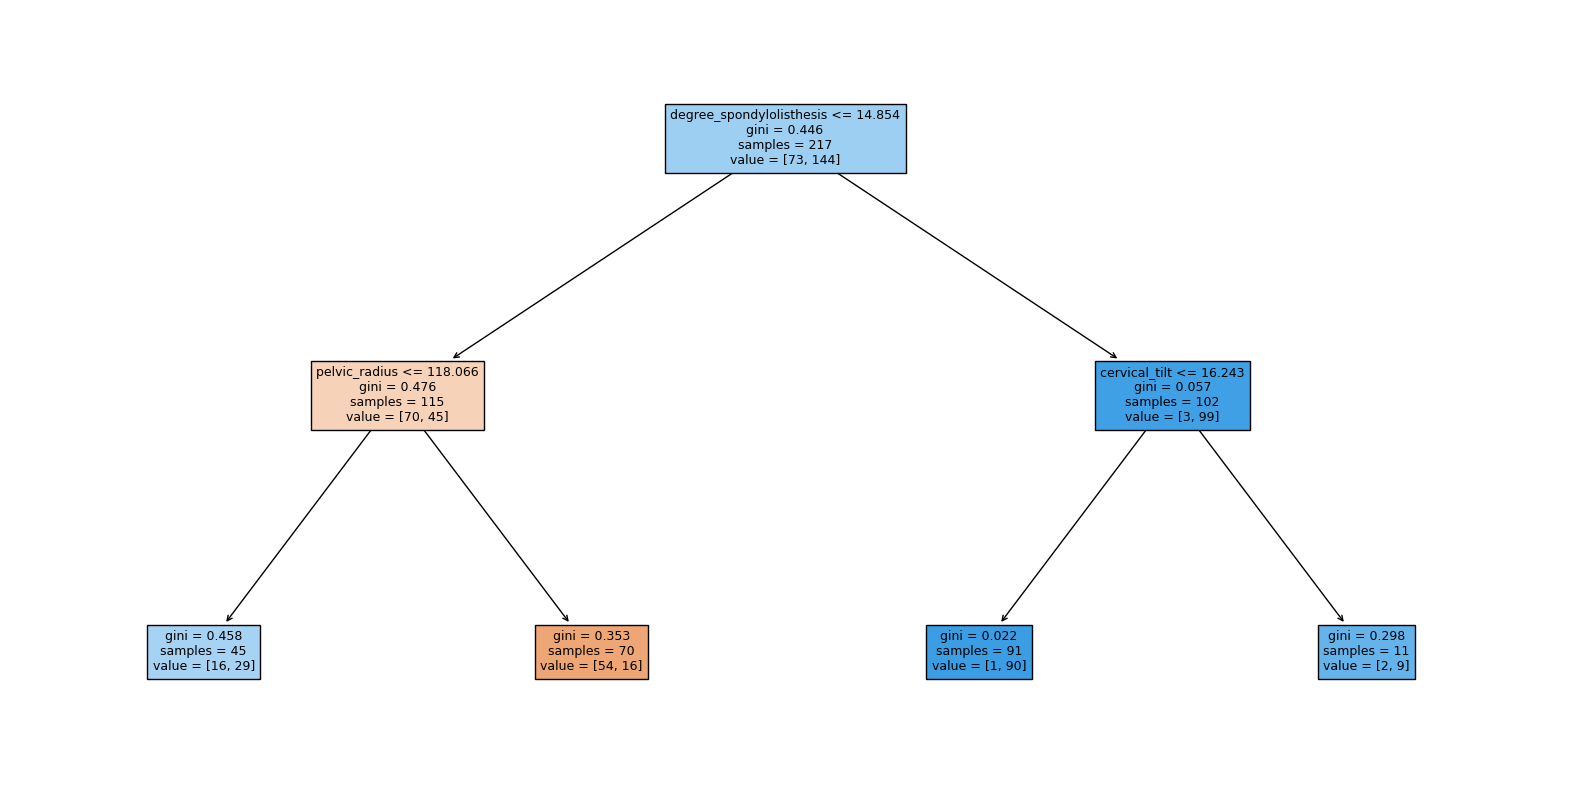

In [56]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    clf,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

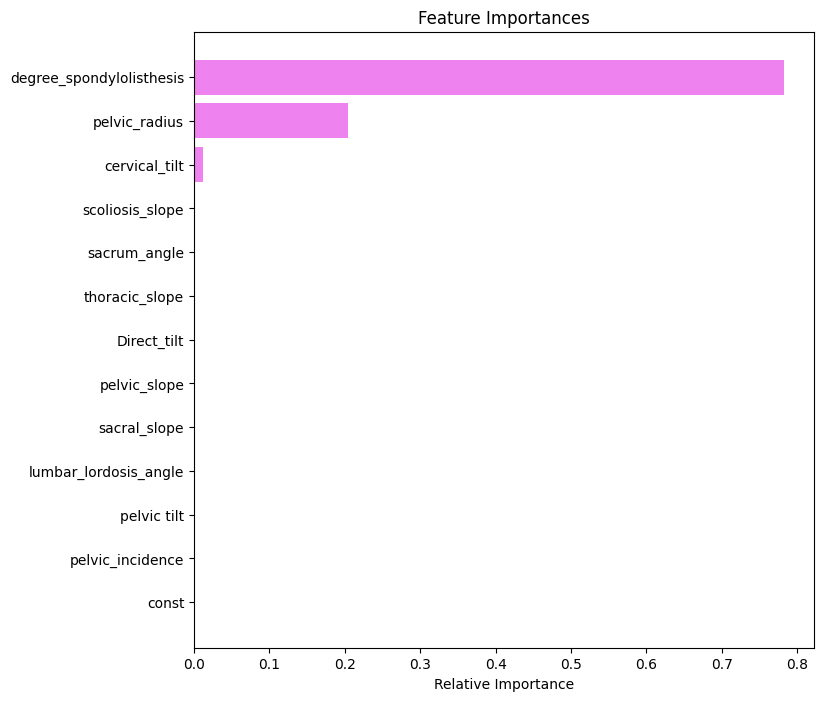

In [57]:
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [58]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [5,10,15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}


# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       min_impurity_decrease=1e-06, random_state=1)

In [59]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.94470,0.97917,0.94000,0.95918


In [79]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': [5,10,15,None],
 'criterion' : ['gini','entropy'],
 'splitter' : ['best','random']

 }

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring='recall',cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [80]:
# Training decision tree with default parameters
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)

# Tuned model
estimator.fit(X_train, y_train)

# Predicting on the test set
y_pred_test1 = model.predict(X_test)
y_pred_test2 = estimator.predict(X_test)

# Checking model performance of Decision Tree with default parameters
print(recall_score(y_test,y_pred_test1))
print(metrics.f1_score(y_test,y_pred_test1))

# Checking model performance of tunedDecision Tree
print(recall_score(y_test,y_pred_test2))
print(metrics.f1_score(y_test,y_pred_test2))

0.7878787878787878
0.8387096774193549
0.8484848484848485
0.8818897637795275


## Corrections in chronological order:

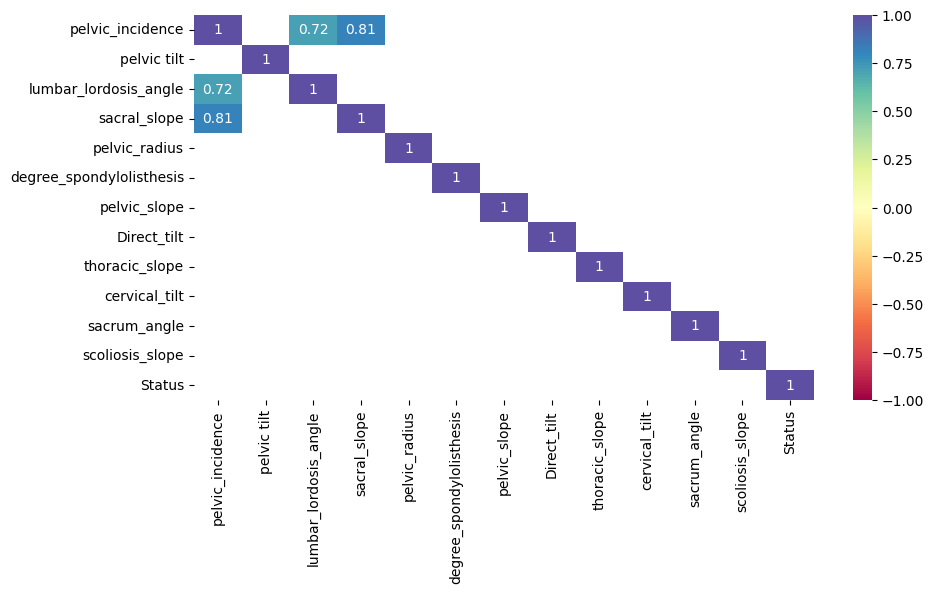

In [81]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr()[data.corr()>=0.7],annot=True,vmax=1,vmin=-1,cmap='Spectral');

In [84]:
data['Status'] = data['Status'].apply(lambda x: 1 if x=='Abnormal' else 0)
X = data.drop(['Status'], axis=1)
Y = data['Status']

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)
y_test.value_counts(normalize=True)

1   0.70968
0   0.29032
Name: Status, dtype: float64

In [85]:
# dataframe with numerical column only
num_feature_set = X.copy()
num_feature_set = add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)

# Calculating VIF
vif_series = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series))

Series before feature selection: 

const                      189.85263
pelvic_incidence                 inf
pelvic tilt                      inf
lumbar_lordosis_angle        2.20083
sacral_slope                     inf
pelvic_radius                1.21589
degree_spondylolisthesis     1.79182
pelvic_slope                 1.02616
Direct_tilt                  1.02991
thoracic_slope               1.01788
cervical_tilt                1.03660
sacrum_angle                 1.01685
scoliosis_slope              1.03299
dtype: float64



In [86]:
# Dropping first variable with high VIF
num_feature_set1 = num_feature_set.drop(['pelvic_incidence'],axis=1)
# Checking VIF value
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set1.values,i) for i in range(num_feature_set1.shape[1])],index=num_feature_set1.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                      189.81279
pelvic tilt                  1.50420
lumbar_lordosis_angle        2.19296
sacral_slope                 2.38021
pelvic_radius                1.21535
degree_spondylolisthesis     1.79035
pelvic_slope                 1.02616
Direct_tilt                  1.02966
thoracic_slope               1.01393
cervical_tilt                1.03660
sacrum_angle                 1.01359
scoliosis_slope              1.01904
dtype: float64



In [87]:
# Dropping second variable with high VIF
num_feature_set2 = num_feature_set.drop(['pelvic tilt'],axis=1)
# Checking VIF value
vif_series2 = pd.Series([variance_inflation_factor(num_feature_set2.values,i) for i in range(num_feature_set2.shape[1])],index=num_feature_set2.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                      189.81279
pelvic_incidence             4.46150
lumbar_lordosis_angle        2.19296
sacral_slope                 3.23899
pelvic_radius                1.21535
degree_spondylolisthesis     1.79035
pelvic_slope                 1.02616
Direct_tilt                  1.02966
thoracic_slope               1.01393
cervical_tilt                1.03660
sacrum_angle                 1.01359
scoliosis_slope              1.01904
dtype: float64



In [88]:
# Dropping the third variable with high VIF
num_feature_set3 = num_feature_set.drop(['sacral_slope'],axis=1)
# Checking VIF value
vif_series3 = pd.Series([variance_inflation_factor(num_feature_set3.values,i) for i in range(num_feature_set3.shape[1])],index=num_feature_set3.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

const                      189.81279
pelvic_incidence             3.92472
pelvic tilt                  1.80064
lumbar_lordosis_angle        2.19296
pelvic_radius                1.21535
degree_spondylolisthesis     1.79035
pelvic_slope                 1.02616
Direct_tilt                  1.02966
thoracic_slope               1.01393
cervical_tilt                1.03660
sacrum_angle                 1.01359
scoliosis_slope              1.01904
dtype: float64





*   Dropping any of the 3 variables will result in a VIF value of less than 5, therefore the minimum number of attributes to be dropped is 1.



In [89]:
# Dropping sacral slope
X_train, X_test, y_train, y_test = train_test_split(num_feature_set3, Y, test_size=0.30, random_state = 1)
# Iteratively dropping variables with a high p-value
X_train2 = X_train.drop(['pelvic_slope'],axis=1)
X_test2 = X_test.drop(['pelvic_slope'],axis=1)
logit = sm.Logit(y_train, X_train2.astype(float))
lg = logit.fit()
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.292533
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      206
Method:                           MLE   Df Model:                           10
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.5419
Time:                        23:57:06   Log-Likelihood:                -63.480
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 3.386e-27
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       21.7184      4.843      4.485      0.000      12.226

In [90]:
X_train3 = X_train2.drop(['scoliosis_slope'],axis=1)
X_test3 = X_test2.drop(['scoliosis_slope'],axis=1)
logit = sm.Logit(y_train, X_train3.astype(float))
lg = logit.fit()
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.292830
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      207
Method:                           MLE   Df Model:                            9
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.5415
Time:                        23:58:38   Log-Likelihood:                -63.544
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 8.514e-28
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       21.6340      4.853      4.458      0.000      12.122

In [91]:
X_train4 = X_train3.drop(['cervical_tilt'],axis=1)
X_test4 = X_test3.drop(['cervical_tilt'],axis=1)
logit = sm.Logit(y_train, X_train4.astype(float))
lg = logit.fit()
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.293124
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      208
Method:                           MLE   Df Model:                            8
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.5410
Time:                        23:59:42   Log-Likelihood:                -63.608
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 2.012e-28
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       21.2065      4.704      4.508      0.000      11.987

In [92]:
X_train5 = X_train4.drop(['Direct_tilt'],axis=1)
X_test5 = X_test4.drop(['Direct_tilt'],axis=1)
logit = sm.Logit(y_train, X_train5.astype(float))
lg = logit.fit()
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.293351
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      209
Method:                           MLE   Df Model:                            7
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.5407
Time:                        00:00:14   Log-Likelihood:                -63.657
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 4.370e-29
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       21.2637      4.712      4.513      0.000      12.028

In [93]:
X_train6 = X_train5.drop(['lumbar_lordosis_angle'],axis=1)
X_test6 = X_test5.drop(['lumbar_lordosis_angle'],axis=1)
logit = sm.Logit(y_train, X_train6.astype(float))
lg = logit.fit()
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.294074
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      210
Method:                           MLE   Df Model:                            6
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.5395
Time:                        00:01:23   Log-Likelihood:                -63.814
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 9.708e-30
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       21.5764      4.663      4.627      0.000      12.437

In [94]:
X_train7 = X_train6.drop(['sacrum_angle'],axis=1)
X_test7 = X_test6.drop(['sacrum_angle'],axis=1)
logit = sm.Logit(y_train, X_train7.astype(float))
lg = logit.fit()
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.294900
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      211
Method:                           MLE   Df Model:                            5
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.5382
Time:                        00:01:52   Log-Likelihood:                -63.993
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 2.000e-30
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       21.3015      4.609      4.622      0.000      12.268

In [95]:
X_train8 = X_train7.drop(['thoracic_slope'],axis=1)
X_test8 = X_test7.drop(['thoracic_slope'],axis=1)
logit = sm.Logit(y_train, X_train8.astype(float))
lg = logit.fit()
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.298431
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      212
Method:                           MLE   Df Model:                            4
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.5327
Time:                        00:02:03   Log-Likelihood:                -64.760
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 6.512e-31
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       19.8000      4.286      4.619      0.000      11.399

In [96]:
score_DT = []
for i in range(1,9):
 dTree = DecisionTreeClassifier(max_depth=i,criterion = 'gini', random_state=1)
 dTree.fit(X_train, y_train)
 pred = dTree.predict(X_train)
 case = {'Depth':i,'Recall':recall_score(y_train,pred)}
 score_DT.append(case)
print(score_DT)

[{'Depth': 1, 'Recall': 0.6875}, {'Depth': 2, 'Recall': 0.8888888888888888}, {'Depth': 3, 'Recall': 0.8402777777777778}, {'Depth': 4, 'Recall': 0.9236111111111112}, {'Depth': 5, 'Recall': 0.9583333333333334}, {'Depth': 6, 'Recall': 0.9722222222222222}, {'Depth': 7, 'Recall': 0.9722222222222222}, {'Depth': 8, 'Recall': 0.9930555555555556}]


In [98]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': [5,10,15,None],
 'criterion' : ['gini','entropy'],
 'splitter' : ['best','random']
 }

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring='recall',cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)

In [99]:
# Training decision tree with default parameters
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)

# Tuned model
estimator.fit(X_train, y_train)

# Predicting on the test set
y_pred_test1 = model.predict(X_test)
y_pred_test2 = estimator.predict(X_test)

# Checking model performance of Decision Tree with default parameters
print(recall_score(y_test,y_pred_test1))
print(metrics.f1_score(y_test,y_pred_test1))

# Checking model performance of tunedDecision Tree
print(recall_score(y_test,y_pred_test2))
print(metrics.f1_score(y_test,y_pred_test2))

0.7878787878787878
0.8253968253968254
0.803030303030303
0.8346456692913385
